In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
d = pd.read_csv("agridata_csv_202110311352.csv")
d

,commodity_name,state,district,market,min_price,max_price,modal_price,date
0,Ajwan,Gujarat,Amreli,Amreli,63.25,79.55,79.55,2019-05-22
1,Ajwan,Gujarat,Banaskanth,Dhanera,80.05,80.05,80.05,2019-05-22
2,Ajwan,Gujarat,Jamnagar,Jamnagar,90.00,155.00,122.50,2019-05-22
3,Ajwan,Gujarat,Mehsana,Kadi,94.50,112.50,107.00,2019-05-22
4,Ajwan,Gujarat,Mehsana,Unjha,21.25,148.50,99.75,2019-05-22
...,...,...,...,...,...,...,...,...
803471,Pumpkin,Uttar Pradesh,Ballia,Rasda,9.60,11.00,10.25,2021-07-13
803472,Pumpkin,Uttar Pradesh,Firozabad,Shikohabad,6.30,6.60,6.50,2021-07-13
803473,Pumpkin,Uttar Pradesh,Pillibhit,Vishalpur,10.00,10.50,10.20,2021-07-13
803474,Raddish,Chattisgarh,Bilaspur,Tiphra,9.00,12.00,11.00,2021-07-13


In [42]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

d['commodity'] = label_encoder.fit_transform(d['commodity_name'])
d

,commodity_name,state,district,market,min_price,max_price,modal_price,date,commodity
0,Ajwan,Gujarat,Amreli,Amreli,63.25,79.55,79.55,2019-05-22,0
1,Ajwan,Gujarat,Banaskanth,Dhanera,80.05,80.05,80.05,2019-05-22,0
2,Ajwan,Gujarat,Jamnagar,Jamnagar,90.00,155.00,122.50,2019-05-22,0
3,Ajwan,Gujarat,Mehsana,Kadi,94.50,112.50,107.00,2019-05-22,0
4,Ajwan,Gujarat,Mehsana,Unjha,21.25,148.50,99.75,2019-05-22,0
...,...,...,...,...,...,...,...,...,...
803471,Pumpkin,Uttar Pradesh,Ballia,Rasda,9.60,11.00,10.25,2021-07-13,177
803472,Pumpkin,Uttar Pradesh,Firozabad,Shikohabad,6.30,6.60,6.50,2021-07-13,177
803473,Pumpkin,Uttar Pradesh,Pillibhit,Vishalpur,10.00,10.50,10.20,2021-07-13,177
803474,Raddish,Chattisgarh,Bilaspur,Tiphra,9.00,12.00,11.00,2021-07-13,178


In [43]:
d['state_']= label_encoder.fit_transform(d['state'])
d['district_']= label_encoder.fit_transform(d['district'])
d['market_']= label_encoder.fit_transform(d['market'])


In [44]:
d.drop(["commodity_name","state","district"],inplace=True,axis=1)

In [45]:
d.drop(["market"],inplace=True,axis=1)

In [46]:
d['month'] = pd.DatetimeIndex(d['date']).month

In [47]:
d.drop(['date'], inplace=True, axis=1)

In [48]:
d

,min_price,max_price,modal_price,commodity,state_,district_,market_,month
0,63.25,79.55,79.55,0,5,15,78,5.0
1,80.05,80.05,80.05,0,5,38,583,5.0
2,90.00,155.00,122.50,0,5,204,915,5.0
3,94.50,112.50,107.00,0,5,301,978,5.0
4,21.25,148.50,99.75,0,5,301,2238,5.0
...,...,...,...,...,...,...,...,...
803471,9.60,11.00,10.25,177,27,34,1828,7.0
803472,6.30,6.60,6.50,177,27,146,2001,7.0
803473,10.00,10.50,10.20,177,27,359,2313,7.0
803474,9.00,12.00,11.00,178,3,72,2185,7.0


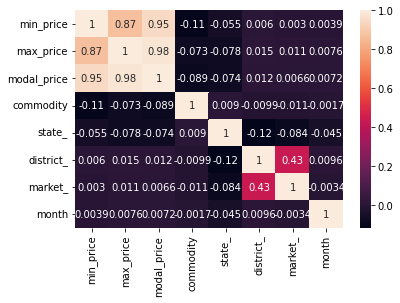

In [49]:
h = d.corr()
sns.heatmap(h,annot=True)

In [50]:
d.drop(['commodity','state_'], inplace=True, axis=1)

In [53]:
d.drop(["district_"],inplace=True,axis=1)

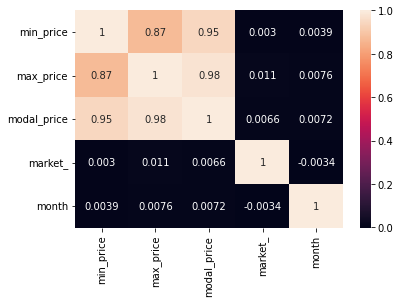

In [54]:
h = d.corr()
sns.heatmap(h,annot=True)

In [55]:
y = d['modal_price']

In [56]:
y

0          79.55
1          80.05
2         122.50
3         107.00
4          99.75
           ...  
803471     10.25
803472      6.50
803473     10.20
803474     11.00
803475       NaN
Name: modal_price, Length: 803476, dtype: float64

In [57]:
d.drop(['month'],inplace=True,axis=1)

In [59]:
d.drop(["modal_price"],inplace=True,axis=1)

In [60]:
d.drop(["market_"],inplace=True,axis=1)

In [61]:
x=d

In [62]:
y=y.interpolate()

In [63]:
x=x.interpolate()

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [65]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)
print("Linear Regression accuracy: ",model.score(x_train, y_train))

Linear Regression accuracy:  0.994986931469977


In [67]:
import pickle
with open('price_prediction','wb') as f:
  pickle.dump(model,f)